In [29]:
#Linear Regression

import math, csv, random
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

file_name = "stockdata.txt"

start = dt.datetime(2013,1,1)
stop  = dt.datetime(2018,3,16)

def ReadData():
        global df1
        df1 = pd.read_csv(file_name, delimiter=',', index_col='Date', parse_dates=True)
        df1 = df1[df1.index >= start]
        df1 = df1[df1.index <= stop]



In [30]:
        ReadData()
        
        # Implement the Linear Regression model:
        lr = linear_model.LinearRegression()
        x = df1.drop(["Close","Time"],axis=1).shift(1)[1:]
        y = df1['Close'][1:]
        lr.fit(x,y)
        y_predicted = lr.predict(x)

In [31]:
df1.head()

,Time,Open,High,Low,Close,Vol,OI
Date,,,,,,,
2013-01-01,23:00:00,91.78,91.82,91.56,91.70,679,0
2013-01-01,23:15:00,91.70,91.75,91.63,91.65,244,0
2013-01-01,23:30:00,91.65,91.67,91.64,91.67,117,0
2013-01-01,23:45:00,91.67,91.72,91.65,91.70,157,0
2013-01-02,00:00:00,91.65,91.71,91.63,91.69,213,0


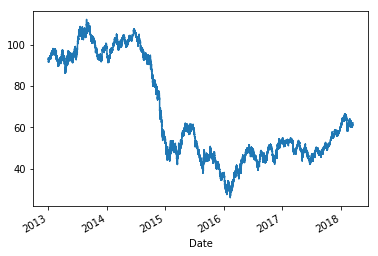

In [42]:
# Plot a subset of column(s) to preview the current training set (Open price)
x = df1.drop(["Time","Close","OI"],axis=1).shift(1)[1:]
x.tail()
x['Open'].plot()

91.65


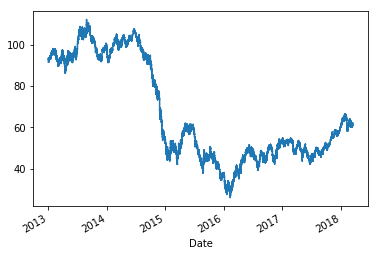

In [43]:
# Plot the label targets (ie. next day price)
y = df1['Close'][1:]
print(y.iloc[0])
y.plot()

df1['Close'][117687] =  62.19
x shape:  (117687, 4)
y (target) shape: (117687,)
Length of y_predicted list:  117687
Today's features [O, H, L]:  62.195 62.21 62.19
Tomorrow's close = (target for above features)  62.19
Linear regression prediction for tomorrow's close: y predicted[0]: 62.203511868925176


Mean squared error: 0.02
Variance score: 1.00
Graph of by how many $ the prediction was off, see some days was off by $2+ !:


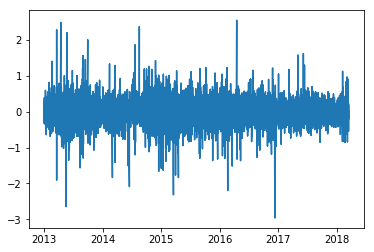

In [44]:
# Output the training set and predictions for any random day as an eyeball test of the code (more substantive tests to be coded later):
print("df1['Close'][117687] = ", df1['Close'][117687])
print("x shape: ",x.shape)
print("y (target) shape:",y.shape)
print("Length of y_predicted list: ",len(y_predicted))
print("Today's features [O, H, L]: ",x['Open'][117686], x['High'][117686], x['Low'][117686])
print("Tomorrow's close = (target for above features) ", y.iloc[117686])
print("Linear regression prediction for tomorrow's close: y predicted[0]:", y_predicted[117686])
print('\n')
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_predicted))
print('Variance score: %.2f' % r2_score(y, y_predicted))
print("Graph of by how many $ the prediction was off, see some days was off by $2+ !:")
plt.plot(y_predicted-y)


In [45]:
# Generate a list of binary signals for the trading system (1 = buy the stock, 0 = sell the stock or don't enter any position.)
for i,y in enumerate(y_predicted):
    if i > 1 and y > y_predicted[i-1]:
        Signal = 1
    else:
        Signal = 0    